## INGORE THIS CODE FOR OOD GENERATION. 
### Use ood_generator.py from utils. This one's splits are not consistent with our splits for train/val/test

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import medmnist
from medmnist import INFO, Evaluator
from sklearn.utils import shuffle
import seaborn as sns
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch.nn as nn
from torch.utils.data import Dataset
import torch
import os
sns.set_style("whitegrid")

In [34]:
ood_data_path = '/home/ikboljonsobirov/uncertainty-benchmark/experiments/ood_data/'

In [91]:
data_flag = 'organmnist3d'
info = medmnist.INFO[data_flag]
num_classes = len(info['label'])
DataClass = getattr(medmnist, info['python_class'])

# Load dataset
train_dataset = DataClass(split='train', download=True)
val_dataset = DataClass(split='val', download=True)
test_dataset = DataClass(split='test', download=True)


Using downloaded and verified file: /home/ikboljonsobirov/.medmnist/organmnist3d.npz
Using downloaded and verified file: /home/ikboljonsobirov/.medmnist/organmnist3d.npz
Using downloaded and verified file: /home/ikboljonsobirov/.medmnist/organmnist3d.npz


(972, 28, 28, 28) (972, 1)
(610, 28, 28, 28) (610, 1)
(161, 28, 28, 28) (161, 1)
(1743, 28, 28, 28) (1743, 1)
-0.49576756292632684
0.5042324370736732
(11,)
(11,)


Text(0.5, 1.0, 'organmnist3d distribution')

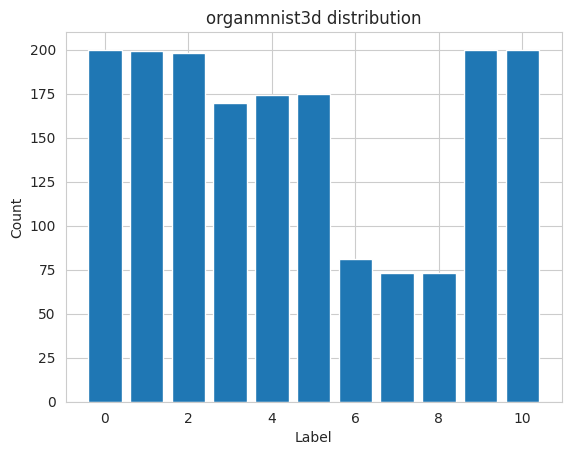

In [92]:
data = np.load(f'/home/ikboljonsobirov/.medmnist/{data_flag}.npz')
X = data['train_images']
y = data['train_labels']
print(X.shape, y.shape)
X_2 = data['test_images']
y_2 = data['test_labels']
print(X_2.shape, y_2.shape)
X_3 = data['val_images']
y_3 = data['val_labels']
print(X_3.shape, y_3.shape)

X = np.append(X, X_2, axis=0)
y = np.append(y, y_2, axis=0)
X = np.append(X, X_3, axis=0)
y = np.append(y, y_3, axis=0)
print(X.shape, y.shape)

X, y = shuffle(X, y)
# Make X zero mean and unit std
X = X/np.max(X)
X = X - np.mean(X)
print(np.min(X))
print(np.max(X))

vals = np.unique(y)
totals = np.array([np.sum(np.where(y==i, 1, 0)) for i in range(0, np.unique(y).shape[0])])
print(vals.shape)
print(totals.shape)
plt.bar(vals, totals)
plt.ylabel('Count')
plt.xlabel('Label')
plt.title(f'{data_flag} distribution')

In [93]:
print(len(X), len(y))
split_threshold = int(len(X)/5)
split_threshold

1743 1743


348

In [94]:
X_1, y_1 = X[:split_threshold], y[:split_threshold]
X_2, y_2 = X[split_threshold:split_threshold*2], y[split_threshold:split_threshold*2]
X_3, y_3 = X[split_threshold*2:split_threshold*3], y[split_threshold*2:split_threshold*3]
X_4, y_4 = X[split_threshold*3:split_threshold*4], y[split_threshold*3:split_threshold*4]
X_5, y_5 = X[split_threshold*4:split_threshold*5], y[split_threshold*4:split_threshold*5]
# X_6, y_6 = X[split_threshold*5:split_threshold*6], y[split_threshold*5:split_threshold*6]
# X_7, y_7 = X[split_threshold*6:split_threshold*7], y[split_threshold*6:split_threshold*7]

In [101]:
# Domain 1 
# Split into train and test sets 
print(X_1.shape)
X_1_train, y_1_train = X_1[:int(len(X_1)*0.75)], y_1[:int(len(X_1)*0.75)]
X_1_test, y_1_test = X_1[int(len(X_1)*0.75):], y_1[int(len(X_1)*0.75):]
print(X_1_train.shape, X_1_test.shape)
print(y_1_train.shape, y_1_test.shape)

if not os.path.exists(os.path.join(ood_data_path, data_flag)):
    os.makedirs(os.path.join(ood_data_path, data_flag))
np.save(os.path.join(ood_data_path, data_flag, 'X_1_train'), X_1_train)
np.save(os.path.join(ood_data_path, data_flag, 'X_1_test'), X_1_test)
np.save(os.path.join(ood_data_path, data_flag, 'y_1_train'), y_1_train)
np.save(os.path.join(ood_data_path, data_flag, 'y_1_test'), y_1_test)

(348, 28, 28, 28)
(261, 28, 28, 28) (87, 28, 28, 28)
(261, 1) (87, 1)


In [102]:
# Domain 2 - Decreased contrast
# Split into train and test sets 
print(X_2.shape)
print(X_2.max())
print(X_2.min())
X_2_shift = X_2/X_2.max() * 0.40

print(X_2_shift.max())
print(X_2_shift.min())

X_2_train, y_2_train = X_2_shift[:int(len(X_1)*0.75)], y_2[:int(len(X_1)*0.75)]
X_2_test, y_2_test= X_2_shift[int(len(X_1)*0.75):], y_2[int(len(X_1)*0.75):]
print(X_2_train.shape, X_2_test.shape)
print(y_2_train.shape, y_2_train.shape)

np.save(os.path.join(ood_data_path, data_flag, 'X_2_train'), X_2_train)
np.save(os.path.join(ood_data_path, data_flag, 'X_2_test'), X_2_test)
np.save(os.path.join(ood_data_path, data_flag, 'y_2_train'), y_2_train)
np.save(os.path.join(ood_data_path, data_flag, 'y_2_test'), y_2_test)

(348, 28, 28, 28)
0.5042324370736732
-0.49576756292632684
0.4
-0.393284942796245
(261, 28, 28, 28) (87, 28, 28, 28)
(261, 1) (261, 1)


In [106]:
# Domain 3 - Increase contrast
# Split into train and test sets 
print(X_3.shape)
print(X_3.max())
print(X_3.min())
X_3_shift = X_3/X_3.max() * 1.1

print(X_3_shift.max())
print(X_3_shift.min())

X_3_train, y_3_train = X_3_shift[:int(len(X_1)*0.75)], y_3[:int(len(X_1)*0.75)]
X_3_test, y_3_test = X_3_shift[int(len(X_1)*0.75):], y_3[int(len(X_1)*0.75):]
print(X_3_train.shape, X_3_test.shape)
print(y_3_train.shape, y_3_test.shape)

np.save(os.path.join(ood_data_path, data_flag, 'X_3_train'), X_3_train)
np.save(os.path.join(ood_data_path, data_flag, 'X_3_test'), X_3_test)
np.save(os.path.join(ood_data_path, data_flag, 'y_3_train'), y_3_train)
np.save(os.path.join(ood_data_path, data_flag, 'y_3_test'), y_3_test)

(348, 28, 28, 28)
0.5042324370736732
-0.49576756292632684
1.1
-1.0815335926896736
(261, 28, 28, 28) (87, 28, 28, 28)
(261, 1) (87, 1)


In [107]:
# Domain 4 - noise gaussian blur
from scipy.ndimage import gaussian_filter

# Split into train and test sets 
X_4_blur = np.zeros_like(X_4)
for i in range(0, X_4_blur.shape[0]):
    sampl = np.random.uniform(low=0.25, high=0.75, size=(1,))
    result = gaussian_filter(X_4[i], sigma=sampl[0])
    X_4_blur[i] = result

X_4_train, y_4_train = X_4_blur[:int(len(X_1)*0.75)], y_4[:int(len(X_1)*0.75)]
X_4_test, y_4_test = X_4_blur[int(len(X_1)*0.75):], y_4[int(len(X_1)*0.75):]
print(X_4_train.shape, X_4_test.shape)
print(y_4_train.shape, y_4_test.shape)

np.save(os.path.join(ood_data_path, data_flag, 'X_4_train'), X_4_train)
np.save(os.path.join(ood_data_path, data_flag, 'X_4_test'), X_4_test)
np.save(os.path.join(ood_data_path, data_flag, 'y_4_train'), y_4_train)
np.save(os.path.join(ood_data_path, data_flag, 'y_4_test'), y_4_test)


(261, 28, 28, 28) (87, 28, 28, 28)
(261, 1) (87, 1)


In [108]:
# Domain 5
# Split into train and test sets 
print(X_5.shape)
noise = np.random.normal(scale=0.1, size=(X_5.shape))
X_5_noise = X_5 + noise

X_5_train, y_5_train = X_5_noise[:int(len(X_1)*0.75)], y_5[:int(len(X_1)*0.75)]
X_5_test, y_5_test = X_5_noise[int(len(X_1)*0.75):], y_5[int(len(X_1)*0.75):]
print(X_5_train.shape, X_5_test.shape)

np.save(os.path.join(ood_data_path, data_flag, 'X_5_train'), X_5_train)
np.save(os.path.join(ood_data_path, data_flag, 'X_5_test'), X_5_test)
np.save(os.path.join(ood_data_path, data_flag, 'y_5_train'), y_5_train)
np.save(os.path.join(ood_data_path, data_flag, 'y_5_test'), y_5_test)


(348, 28, 28, 28)
(261, 28, 28, 28) (87, 28, 28, 28)
